# Pandas

## Data Loading

In [872]:
import pandas as pd

df = pd.read_csv(
    "/Users/kevin/PycharmProjects/imc_dev_exercise/transactions/Kevin's Bank_2023-08-09_00-08-37.csv"
)
print(df.head(5))

                     Datetime Account Number  Credit  Debit  Balance
0  2023-08-09 00:08:37.954083     BnBnuUyUtB     NaN  322.0     3602
1  2023-08-09 00:08:37.954083     QZBOGINEUM   322.0    NaN      619
2  2023-08-09 00:08:37.954161     CkewEClJjH     NaN  242.0     1756
3  2023-08-09 00:08:37.954161     xDRaafflDq   242.0    NaN     2623
4  2023-08-09 00:08:37.954211     joWXNWsQKi     NaN  231.0     4734


## Data Transformation

### Group by size() to get number of transactions per Account

In [873]:
# group by the 'Account Number' column and calculates the size for each account, turns df into a pd.Series
df_count = df.groupby('Account Number').size()
print(f"This is pd.DataFrame: {isinstance(df_count, pd.DataFrame)}")
print(df_count.head(5))
print("\n")

# reset the index (move Account Number back into a column), name the new column added from the series, and turn it back into a pd.Dataframe
df_count = df_count.reset_index(name = "Transactions")
print(f"This is pd.DataFrame: {isinstance(df_count, pd.DataFrame)}")
print(df_count.head(5))
print("\n")

# finally, set the index
df_count = df_count.set_index("Account Number")
print(df_count.head(5))

This is pd.DataFrame: False
Account Number
AFtSFVqTli    23
BkmJOuSmKI    17
BnBnuUyUtB    14
CkewEClJjH    25
DzGAwdmMro    28
dtype: int64


This is pd.DataFrame: True
  Account Number  Transactions
0     AFtSFVqTli            23
1     BkmJOuSmKI            17
2     BnBnuUyUtB            14
3     CkewEClJjH            25
4     DzGAwdmMro            28


                Transactions
Account Number              
AFtSFVqTli                23
BkmJOuSmKI                17
BnBnuUyUtB                14
CkewEClJjH                25
DzGAwdmMro                28


### Group by last() to get latest balance

In [874]:
df_last = df.groupby('Account Number')['Balance'].last()
print(df_last.head(5))

Account Number
AFtSFVqTli    4844
BkmJOuSmKI    1002
BnBnuUyUtB    3475
CkewEClJjH    2977
DzGAwdmMro    3607
Name: Balance, dtype: int64


### Aggregate over group

In [875]:
df_min_max = df.groupby(["Account Number"])["Balance"].agg(
    [("min_balance", "min"), ("max_balance", "max")]
)
print(df_min_max.head(5))

                min_balance  max_balance
Account Number                          
AFtSFVqTli             3430         5100
BkmJOuSmKI             1002         2966
BnBnuUyUtB             3216         4290
CkewEClJjH             1218         3413
DzGAwdmMro             2850         4768


### Put it all together

In [876]:
df_final = pd.concat([df_count, df_min_max, df_last], axis = 1) # axis = 1 concats horizontally
df_final = df_final.sort_values(by="Transactions", ascending= False)
print(df_final.head(10))

                Transactions  min_balance  max_balance  Balance
Account Number                                                 
FKpsTAfuOu                32          129         1948      186
qpeWaijvhe                30         2378         4438     4378
xDRaafflDq                29         1089         3176     1773
nZmTtDZpDu                29         1932         4567     2768
DzGAwdmMro                28         2850         4768     3607
STjBIhsajT                28         1362         5041     1794
JiBkslUhbP                27         3867         5049     4352
GUPsGodXRS                26           47         1417     1064
QxLaNNimsr                25          686         2463      861
PrhagnfxNZ                25         2217         3838     3634


## Analysis

### Inactive accounts

In [877]:
df_inactive = df_final.loc[df_final['Transactions'] < 10]
print(df_inactive)

                Transactions  min_balance  max_balance  Balance
Account Number                                                 
LyBrjOgGPF                 9           27          673       27
JsLtwPeZcK                 9         2806         3571     2806
HGiZMCEHNZ                 6          422         1362     1362


### Below Threshold

In [878]:
df_broke = df_final.loc[df_final['Balance'] < 100]
print(df_broke)

                Transactions  min_balance  max_balance  Balance
Account Number                                                 
fNJnKtUbQz                20           56         2390       95
rTOKtYkxSi                13           60          873       60
sqQgQrIWRO                13           23         1123       23
UYjxsEcAfW                11           39          811       39
LyBrjOgGPF                 9           27          673       27


### Most Transactions

FKpsTAfuOu


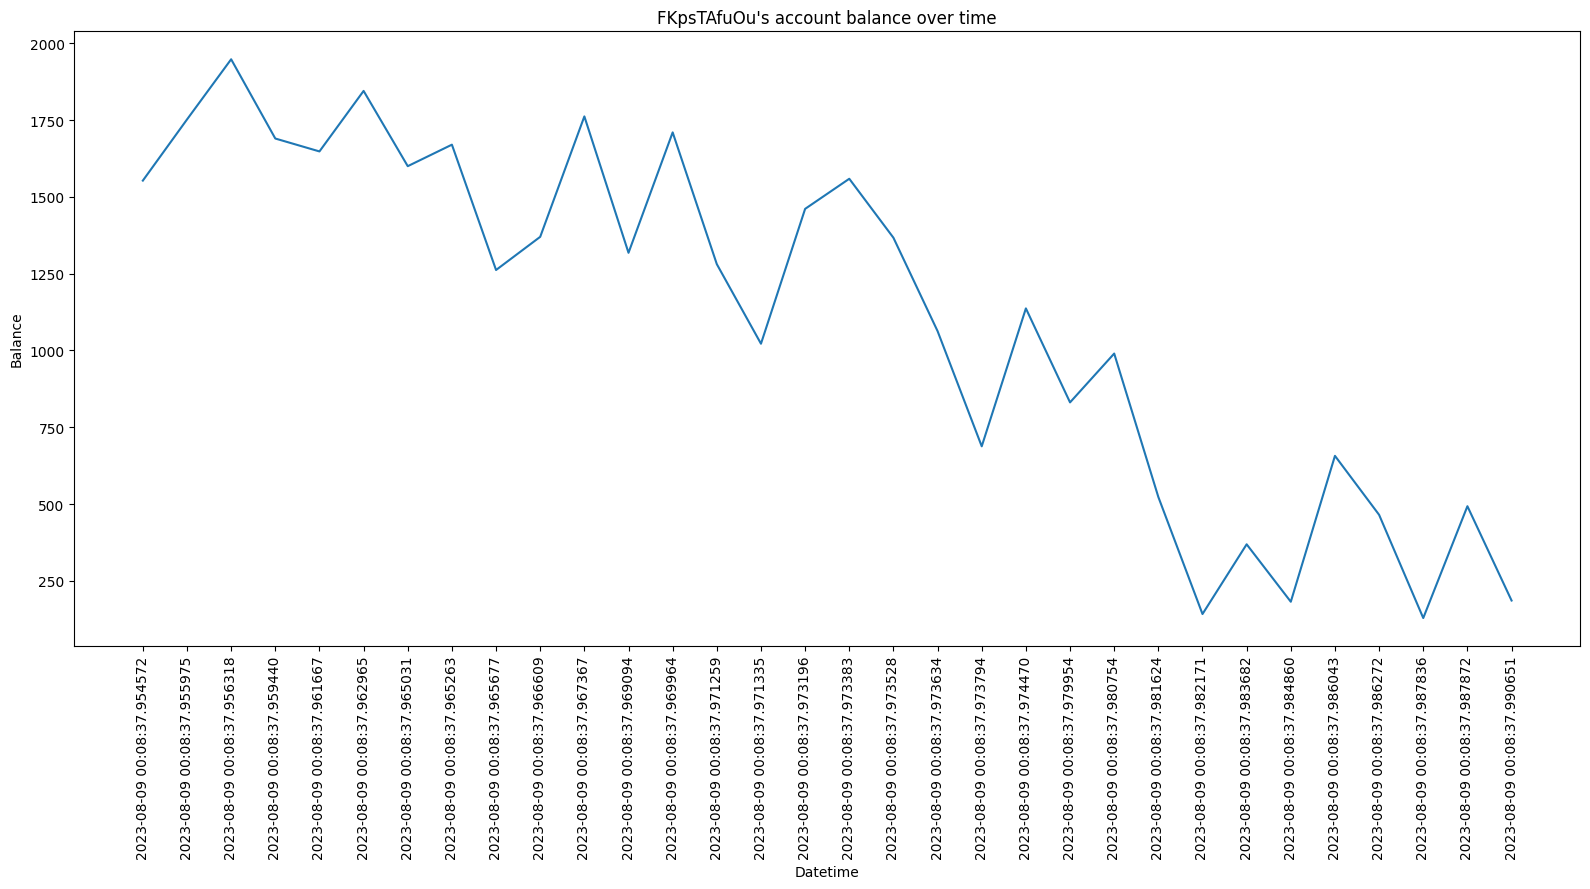

In [879]:
import matplotlib.pyplot as plt
# find account with highest number of transactoins
account = df_final['Transactions'].idxmax()
print(account)

# filter df for rows
df_highest_account = df[df['Account Number'] == account]
df_highest_account.head(10)

# plot the balance over time
plt.figure(figsize=(16,9))
plt.plot(df_highest_account['Datetime'], df_highest_account['Balance'])
plt.xlabel('Datetime')
plt.ylabel('Balance')
plt.title(f"{account}'s account balance over time")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()